In [3]:
import numpy as np
import matplotlib.pyplot as plt

Notre fonction prend en argument la composition du milieu sous forme de liste de tuple. Pour chaque atome différent contenu dans le milieu, une liste contenant le numéro atomique ainsi que la fraction par poid obtenu à l'aide du site web https://physics.nist.gov/cgi-bin/Star/compos.pl?refer=ap&matno=119 doit être ajouté à la liste composition_atomique. Aussi, la masse volumique du milieu doit être donnée en argument. L'argument composition a donc la forme suivante:

composition_atomique = [(Z_1, frac_by_weight_1), (Z_2, frac_by_weight_2), ...,  (Z_n, frac_by_weight_n)]

La fonction est donc la suivante:

In [84]:
def densité_électronique(composition_atomique, masse_volumique):
    nbr_électrons_volumique = 0
    avogadro = 6.023e23
    masse_atomique = {1: 1.007975, 6: 12.0106, 7: 14.006855, 8: 15.9940, 12: 24.3055, 15: 30.97396200, 16: 32.0675, 20: 40.078} 
    for x in composition_atomique:
        nbr_électrons_volumique += masse_volumique * x[1] * avogadro * x[0] / masse_atomique[x[0]]
    return nbr_électrons_volumique

Ci-dessous, nous allons calculer la densité électronique de l'eau liquide. En effet, sachant que la densité de l'eau liquide est de 1 g/cm^3 et que la fraction du poids relié à l'hydrogène (Z=1) est de 0,111894 et celle relié à l'oxygène (Z=8) est de 0,888106, nous pouvons calculer la densité électronique de l'eau liquide à l'aide de la fonction _densité_électronique_ en lui donnant en argument les données précédentes.

In [80]:
eau = [(1, 0.111894), (8, 0.888106)]
densité_électronique_eau = densité_électronique(eau, 1)
print(densité_électronique_eau)

3.3441399781206795e+23


Maintenant, pour ce qui est de l'os compact, nous allons donné à la liste de tuple _os_ le numéro atomique suivi de la fraction du poids relié à ce numéro atomique. Avec la fonction *densité_électronique*, nous pouvons donné en argument la liste *os* ainsi que la densité pour calculer la densité électronique d'un os solide.

In [83]:
os = [(1,0.063984), (6,0.278000), (7,0.027000), (8,0.410016), (12,0.002), (15,0.07), (16,0.002), (20,0.147)]
densité_électronique_os = densité_électronique(os, 1.85)
print('''La densité électronique d'un os solide est de '''+str(densité_électronique_os)+''' électrons par centimètres cubes''')

La densité électronique d'un os solide est de 5.907502679399622e+23 électrons par centimètres cubes


Voici ci-dessous, les énergies moyenne d'excitation de nos deux milieux en eV obtenues encore une fois sur le site web suivant:https://physics.nist.gov/cgi-bin/Star/compos.pl?refer=ap&matno=119

In [115]:
Énergie_moyenne_excitation_eau = 75
Énergie_moyenne_excitation_os = 91.9

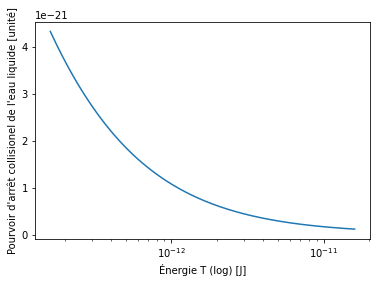

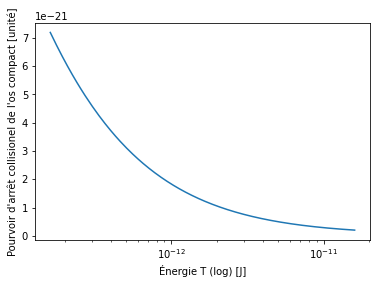

In [146]:
T = np.linspace(1,100,1000)
T = T*1.602e-13
r_e = 2.8179e-15
m_e = 9.1094e-31
c = 3e8
m_p = 1.6726e-27
gamma = T/(m_p*c**2) + 1
Beta = np.sqrt((gamma**2-1)/gamma**2)
a = 2*m_e*c**2
b = 1 + (m_e/m_p)**2
delta = 2*m_e/m_p
T_emax = (a*(gamma**2-1))/(b+(delta*gamma))
S_col_eau = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_eau*(10**-6)) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_eau*1.60218e-19)**2))-2*(Beta**2))
S_col_os = 2 * np.pi * (r_e ** 2)* m_e * (c ** 2) * (densité_électronique_os*(10**-6)) * (1/Beta**2) * (np.log((2*m_e*(c**2)*(Beta**2)*(gamma**2)*T_emax)/((Énergie_moyenne_excitation_os*1.60218e-19)**2))-2*(Beta**2))
plt.plot(T, S_col_eau)
plt.xscale('log')
plt.xlabel('Énergie T (log) [J]')
plt.ylabel('''Pourvoir d'arrêt collisionel de l'eau liquide [unité]''')
plt.show()
plt.plot(T, S_col_os)
plt.xscale('log')
plt.xlabel('Énergie T (log) [J]')
plt.ylabel('''Pourvoir d'arrêt collisionel de l'os compact [unité]''')
plt.show()

On utilise l'équation 4 de l'énoncé du devoir. On remplace gamma, beta et T_emax par leur expression correspondat, soit la 6, la 8 et la 9 de l'énoncé pour obtenir tout en fonction de T.

S_col(T) = 2 * np.pi * r_e ** 2 m_e * c ** 2 * n_e / (((T/m_p*c**2 + 1))**2-1)/(T/m_p * c**2 + 1))**2) (np.ln(2 * m_e * c ** 2 * Beta ** 2 * gamma ** 2 * T_emax / I ** 2) - 2 * Beta ** 2)